<a href="https://colab.research.google.com/github/noahkarsky/Spatial_Shrooms/blob/main/iNaturalist_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install contextily

In [52]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import requests
import urllib
import contextily as ctx
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
import geopandas as gpd

In [3]:
from google.colab importa drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [5]:
df = pd.read_csv('/content/drive/My Drive/DataStuff/shroom_spatial/observations-76496.csv')

# this website has the info behind all of the columns: https://www.inaturalist.org/observations/export


In [6]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_zone', 'out_of_range',
       'user_id', 'updated_at', 'quality_grade', 'url', 'image_url',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated', 'latitude',
       'longitude', 'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id'],
      dtype='object')

I did not download all of the available columns from the inaturalist website, but I believe that I grabbed all the necessary features to help us in the ultimate quest of finding shrooms

In [48]:
df.isna().sum()

id                                     0
observed_on_string                    10
observed_on                           10
time_zone                              0
out_of_range                        3846
user_id                                0
updated_at                             0
quality_grade                          0
url                                    0
image_url                             76
description                         3868
num_identification_agreements          0
num_identification_disagreements       0
captive_cultivated                     0
latitude                               5
longitude                              5
positional_accuracy                 1168
geoprivacy                          4410
taxon_geoprivacy                    4382
coordinates_obscured                   0
positioning_method                  3998
positioning_device                  3942
species_guess                       1403
scientific_name                        1
common_name     

In [49]:
df.iloc[135,:]

id                                                                            4108190
observed_on_string                            Wed Sep 14 2016 11:55:18 GMT-0500 (CDT)
observed_on                                                                2016-09-14
time_zone                                                  Central Time (US & Canada)
out_of_range                                                                      NaN
user_id                                                                        144027
updated_at                                                    2017-09-26 14:34:28 UTC
quality_grade                                                                needs_id
url                                   http://www.inaturalist.org/observations/4108190
image_url                           https://static.inaturalist.org/photos/4882376/...
description                                                                       NaN
num_identification_agreements                         

In [35]:
df.quality_grade.value_counts()


needs_id    3537
research     770
casual       103
Name: quality_grade, dtype: int64

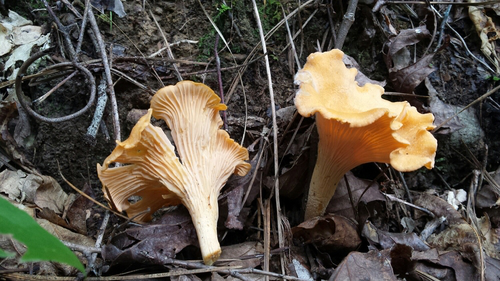

In [34]:
from PIL import Image
import requests
im = Image.open(requests.get(df.iloc[124,9], stream=True).raw)
im

In [58]:
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)

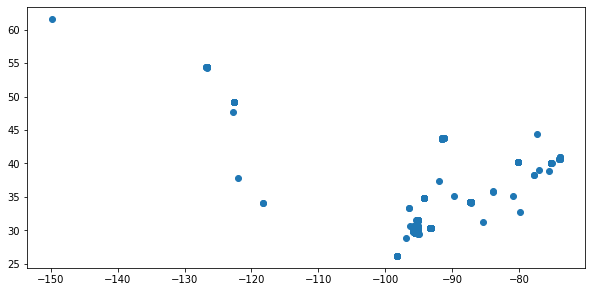

In [67]:
aoi = gpd.read_file('/content/drive/MyDrive/DataStuff/shroom_spatial/spatial/soilsa_a_tx201.shp')

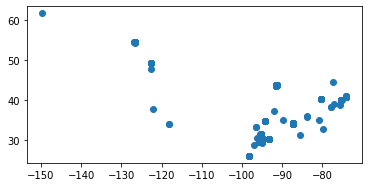

In [71]:
base = aoi.plot()
gdf[gdf.longitude < -20].plot(ax = base , figsize=(10,10))